In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from datetime import datetime
from dateutil.rrule import rrule, DAILY
from sklearn.preprocessing import MinMaxScaler
import folium
from folium import plugins

# Análise e exploração dos dados
Aqui utilizaremos os três arquivos gerados em ***1 - Coleta, processamento e tratamento de dados.ipynb***. Seus dados ficarão armazenados nos seguintes DataFrames:
- df_pl: dados de pedidos em formato longo, com uma linha para cada produto presente nos pedidos;
- df_pw: dados de pedidos em formato wide, com uma linha para cada pedido;
- df_c: dados de clientes, com uma linha para cada cliente.
<p><br>
O significado de cada campo é bastante intuitivo, podendo ser reforçado por meio de análise do notebook mencionado acima. <b><font color='red'>MELHORAR ESSA DESCRIÇÃO DE CAMPOS </font></b>

In [2]:
df_pl = pd.read_csv('arquivos/pedidos_long_final.csv')
df_pl.head()

,id_pedido,data_pedido,id_cliente,bairro_pedido,cidade_pedido,cep_pedido,nome_produto,vl_unitario,tipo_pagamento,agente,hora_pedido,categoria,qt_itens,vl_total
0,54,2020-07-03,39,aldeota,fortaleza,60150060,agua de coco,3.0,Pagar ao retirar na loja,android,11:30:53,agua energeticos e chas,2,6.0
1,54,2020-07-03,39,aldeota,fortaleza,60150060,cajuina,10.0,Pagar ao retirar na loja,android,11:30:53,sucos refrescos e refrigerantes,3,30.0
2,54,2020-07-03,39,aldeota,fortaleza,60150060,couve,3.0,Pagar ao retirar na loja,android,11:30:53,verduras,2,6.0
3,54,2020-07-03,39,aldeota,fortaleza,60150060,doce de leite,12.0,Pagar ao retirar na loja,android,11:30:53,doces e sobremesas,1,12.0
4,54,2020-07-03,39,aldeota,fortaleza,60150060,queijo coalho,25.0,Pagar ao retirar na loja,android,11:30:53,queijos,2,50.0


In [3]:
df_pw = pd.read_csv('arquivos/pedidos_wide_final.csv')
df_pw.head()

,id_pedido,data_pedido,hora_pedido,id_cliente,bairro_pedido,cidade_pedido,cep_pedido,tipo_pagamento,agente,i_agua de coco,...,vl_tot_pimentao [ 500g ],i_abobrinha,qt_abobrinha,vl_tot_abobrinha,i_quiabo [ kg ],qt_quiabo [ kg ],vl_tot_quiabo [ kg ],i_pepino amarelo [ unidade ],qt_pepino amarelo [ unidade ],vl_tot_pepino amarelo [ unidade ]
0,54,2020-07-03,11:30:53,39,aldeota,fortaleza,60150060,Pagar ao retirar na loja,android,True,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
1,56,2020-07-03,11:32:27,38,sao gerardo,fortaleza,60320105,Cartão de Crédito,windows,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
2,59,2020-07-03,11:38:01,35,manoel satiro,fortaleza,60713480,Cartão de Crédito,windows,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
3,60,2020-07-03,11:38:27,33,rodolfo teofilo,fortaleza,60431075,Débito/Transferência,android,True,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
4,64,2020-07-03,11:49:13,40,rodolfo teofilo,fortaleza,60430660,Cartão de Crédito,android,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0


## Distribuição dos valores dos pedidos
Qual a quantidade de pedidos?

In [4]:
len(df_pw)

3527

Vamos visualizar a distribuição dos valores dos pedidos.

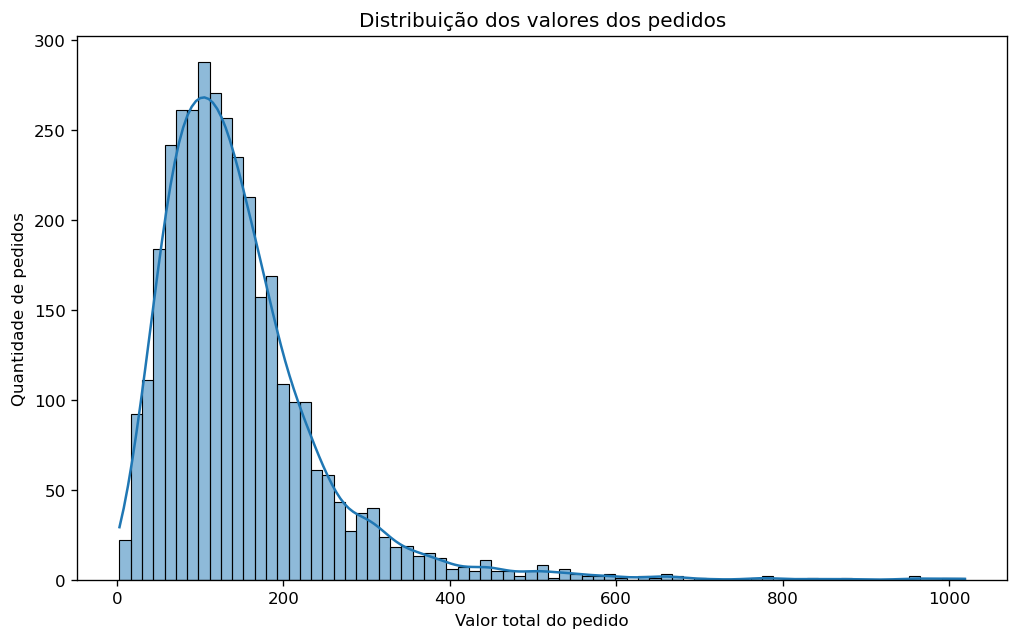

In [5]:
plt.figure(dpi=120,figsize=(10,6))
ax = sns.histplot(data=df_pw,x='vl_final_pedido',kde=True,bins=75)
ax.set(title='Distribuição dos valores dos pedidos',xlabel='Valor total do pedido',ylabel='Quantidade de pedidos');

Vamos visualizar alguns números para complementar o que pode ser observado no gráfico.

In [6]:
df_pw['vl_final_pedido'].describe()

count    3527.000000
mean      147.084293
std        99.728105
min         3.000000
25%        82.750000
50%       126.500000
75%       182.900000
max      1019.300000
Name: vl_final_pedido, dtype: float64

Por sua vez, o observado nos valores acima pode ser complementado por meio de um boxplot.

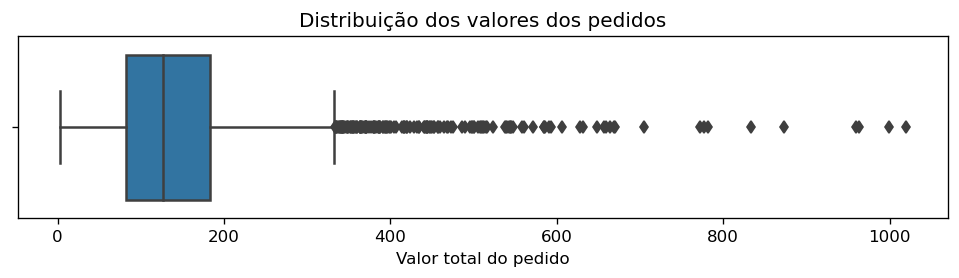

In [7]:
plt.figure(dpi=120,figsize=(10,2))
ax = sns.boxplot(data=df_pw,x='vl_final_pedido')
ax.set(title='Distribuição dos valores dos pedidos',xlabel='Valor total do pedido');

Um violin plot nos ajuda a visualizar a distribuição de outra forma.

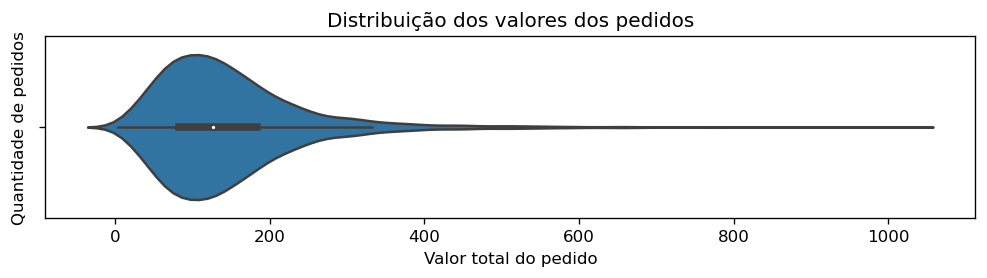

In [8]:
plt.figure(dpi=120,figsize=(10,2))
ax = sns.violinplot(data=df_pw,x='vl_final_pedido')
ax.set(title='Distribuição dos valores dos pedidos',xlabel='Valor total do pedido',ylabel='Quantidade de pedidos');

## Popularidade das categorias de produtos

Primeiramente vamos ver qual as 20 categorias que mais aparecem nos pedidos, independente da quantidade de itens, levando-se em consideração somente sua presença neles. O eixo x representa a quantidade de vezes que produtos de cada categoria foram acrescentados aos pedidos.

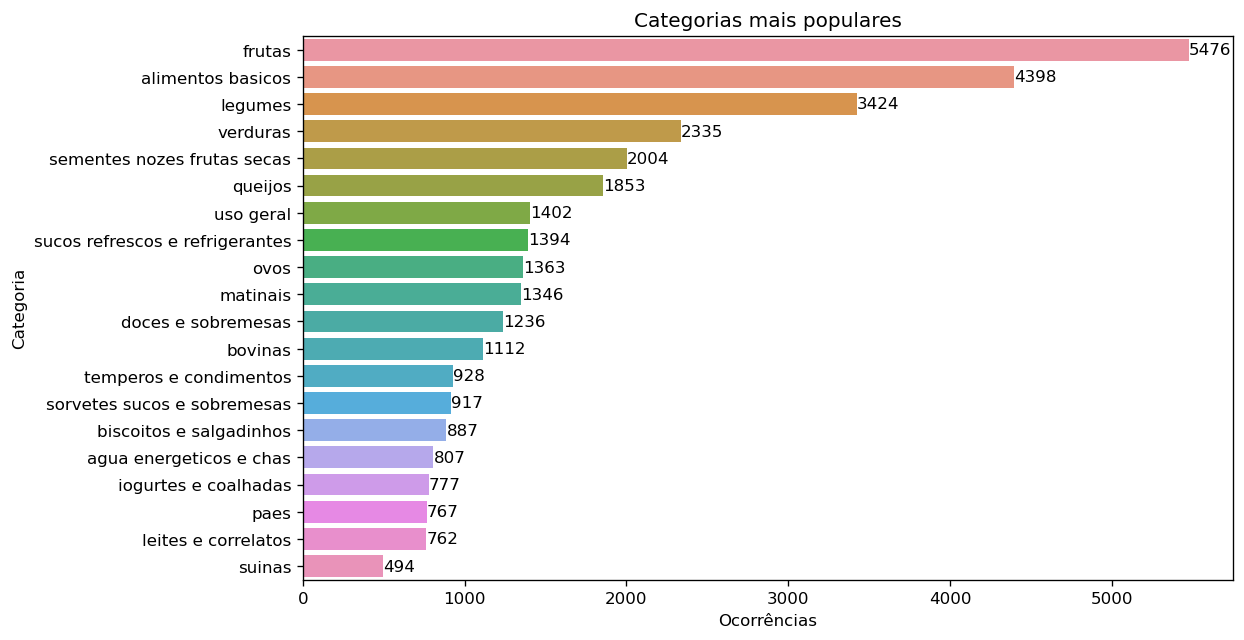

In [9]:
plt.figure(dpi=120,figsize=(10,6))
ax = sns.countplot(data=df_pl,y='categoria',order=df_pl['categoria'].value_counts().index[:20])
ax.set(xlabel='Ocorrências',ylabel='Categoria',title='Categorias mais populares')
ax.bar_label(ax.containers[0]);

## Popularidade dos produtos

Qual são os 20 produtos que mais apareceram aparecem nos pedidos, independente da quantidade que foi incluída em cada um deles? Em outras palavras, em quantos pedidos apareceu cada um desses produtos?

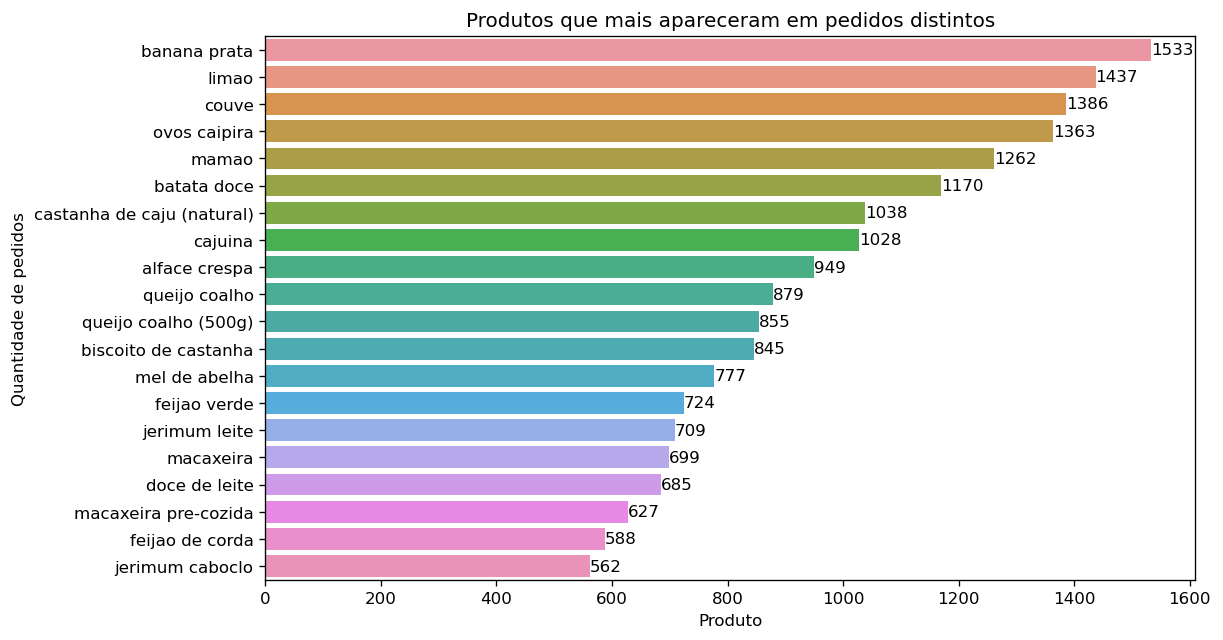

In [10]:
plt.figure(dpi=120,figsize=(10,6))
ax = sns.countplot(data=df_pl,y='nome_produto',order=df_pl['nome_produto'].value_counts().index[:20])
ax.set(title='Produtos que mais apareceram em pedidos distintos',xlabel='Produto',ylabel='Quantidade de pedidos')
ax.bar_label(ax.containers[0]);

E quais são os produtos que mais faturam?

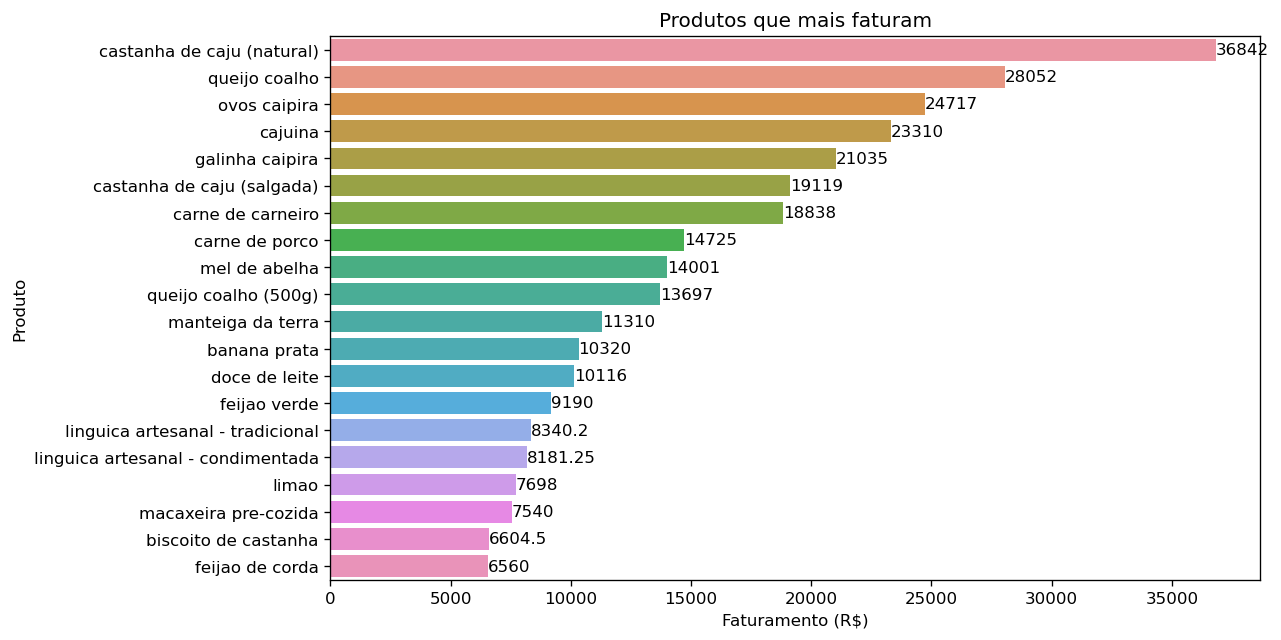

In [11]:
dados = df_pl.groupby('nome_produto').agg({'vl_total':['sum']})['vl_total'].nlargest(20,columns='sum')

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=dados.index,x=dados['sum'])
ax.set(title='Produtos que mais faturam',xlabel='Faturamento (R$)',ylabel='Produto')
ax.bar_label(ax.containers[0]);

E quais produtos são unitariamente mais vendidos?

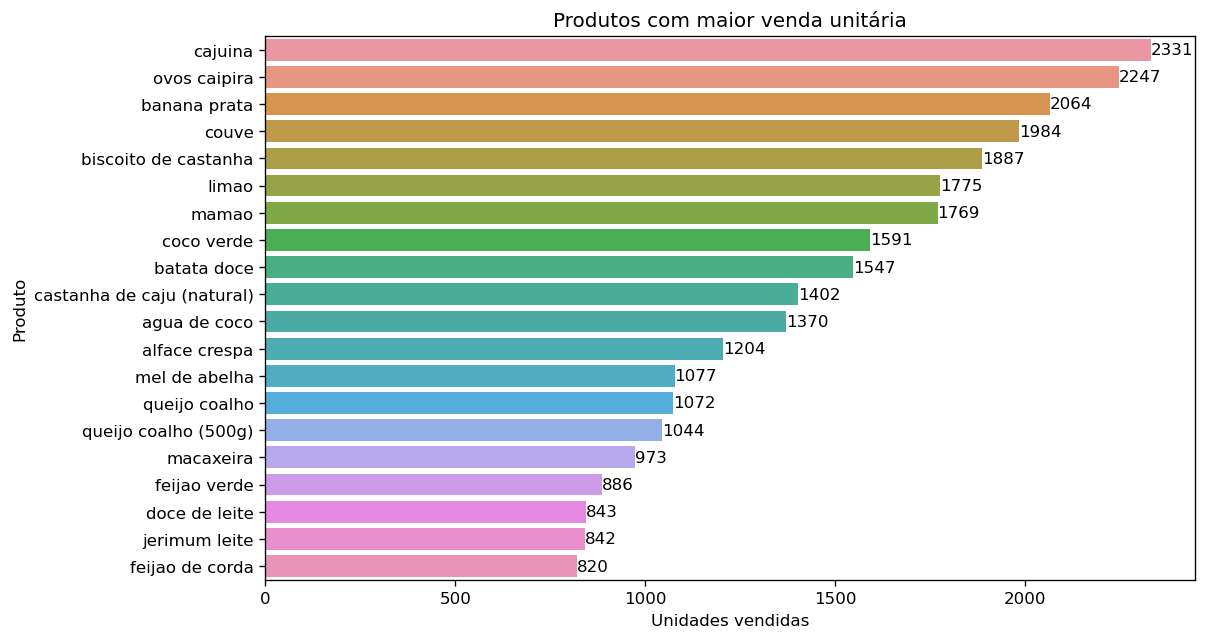

In [12]:
dados = df_pl.groupby('nome_produto').agg({'qt_itens':['sum']})['qt_itens'].nlargest(20,columns='sum')

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=dados.index,x=dados['sum'])
ax.set(title='Produtos com maior venda unitária',xlabel='Unidades vendidas',ylabel='Produto')
ax.bar_label(ax.containers[0]);

## Preços dos produtos e sua correlação com sua popularidade
Em primeiro lugar vamos analisar a distribuição do preço médio dos produtos. É preciso trabalharmos com a média do preço pois ele pode ter sido alterado ao longo do tempo. Analisaremos a venda total de unidades de cada produto.

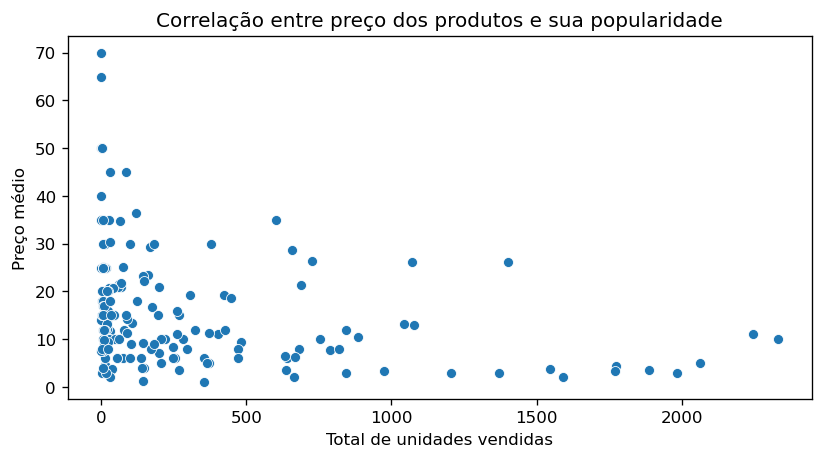

In [13]:
dados = df_pl.groupby('nome_produto').agg({'qt_itens':['sum'],'vl_unitario':['mean']})
dados.columns = ['total itens vendidos','preco medio']

plt.figure(dpi=120,figsize=(8,4))
ax = sns.scatterplot(data=dados,x='total itens vendidos',y='preco medio')
ax.set(title='Correlação entre preço dos produtos e sua popularidade',xlabel='Total de unidades vendidas',
      ylabel='Preço médio');

In [14]:
dados.corr()

,total itens vendidos,preco medio
total itens vendidos,1.000000,-0.290596
preco medio,-0.290596,1.000000


Como era esperado, há uma correlação negativa, porém bastante fraca.<p>
Estes dados despertam curiosidade quanto a quais produtos são mais caros. Vejamos.

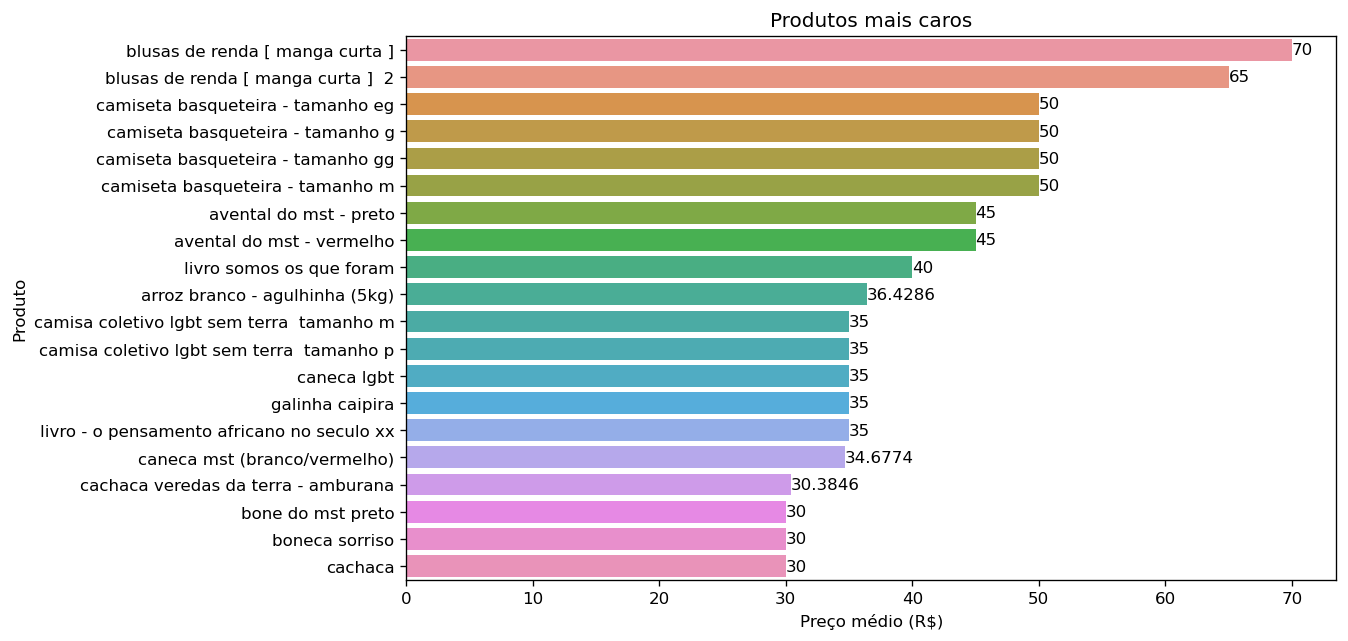

In [15]:
plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(data=dados,x='preco medio',y=dados.index,order=dados['preco medio'].nlargest(20).index)
ax.set(title='Produtos mais caros',xlabel='Preço médio (R$)',ylabel='Produto')
ax.bar_label(ax.containers[0]);

E quais são os mais baratos?

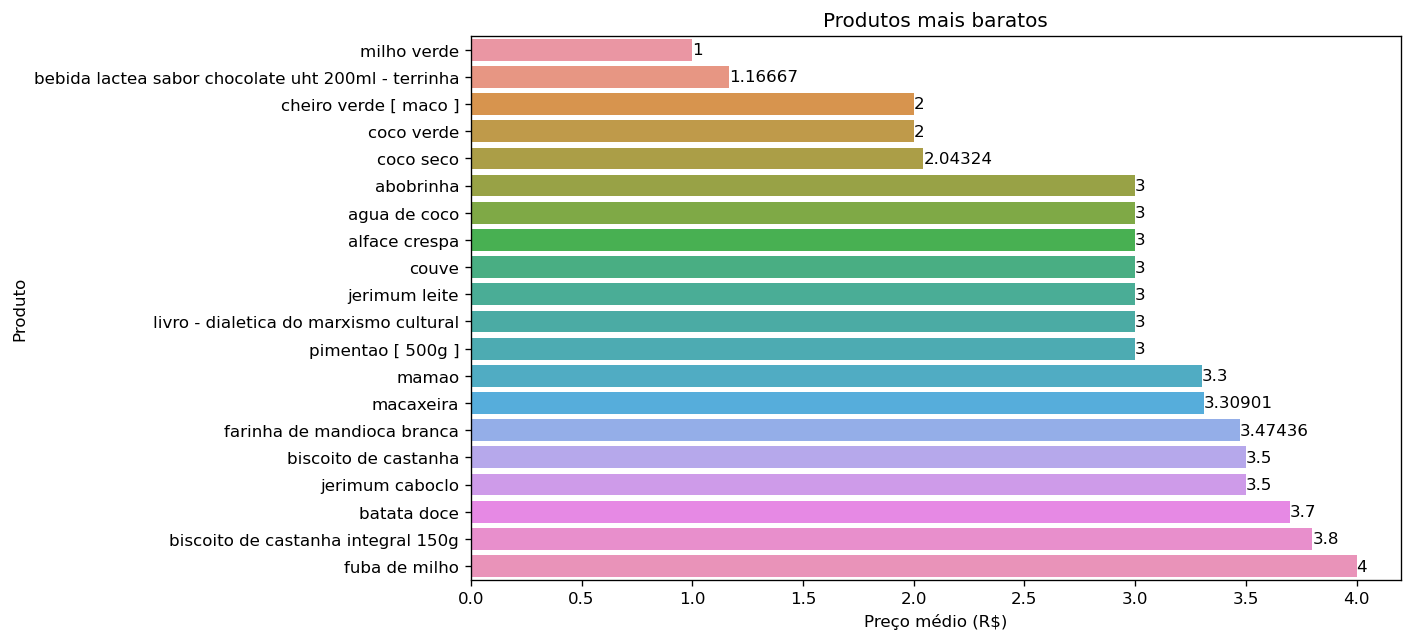

In [16]:
plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(data=dados,x='preco medio',y=dados.index,order=dados['preco medio'].nsmallest(20).index)
ax.set(title='Produtos mais baratos',xlabel='Preço médio (R$)',ylabel='Produto')
ax.bar_label(ax.containers[0]);

## Como os clientes acessam a loja virtual?
Quais as plataformas mais utilizada pelos clientes? Esta informação pode ser valiosa para decidir as prioridades de compatibilidade da plataforma de vendas.

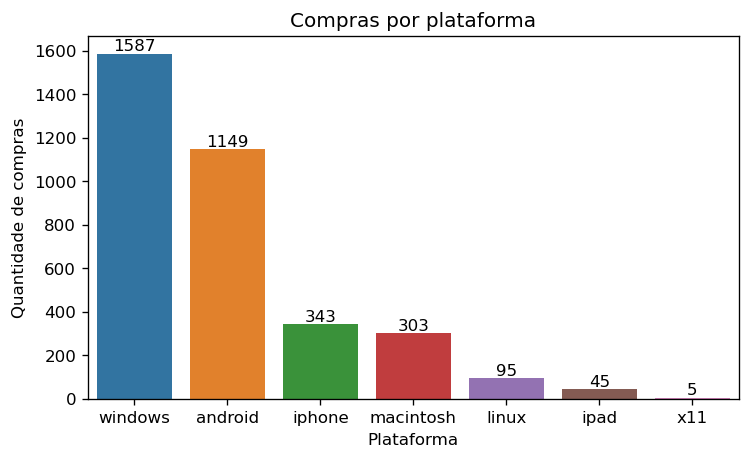

In [17]:
dados = df_pl.groupby('id_pedido')['agente'].agg(pd.Series.mode)

plt.figure(dpi=120,figsize=(7,4))
ax = sns.countplot(data=dados,x=dados.index,order=dados.value_counts().index)
ax.set(title='Compras por plataforma',xlabel='Plataforma',ylabel='Quantidade de compras')
ax.bar_label(ax.containers[0]);

Existe alguma relação entre o valor total dos pedidos e as plataformas utilizadas pelos clientes? Será que alguma tem maior papel no faturamento?

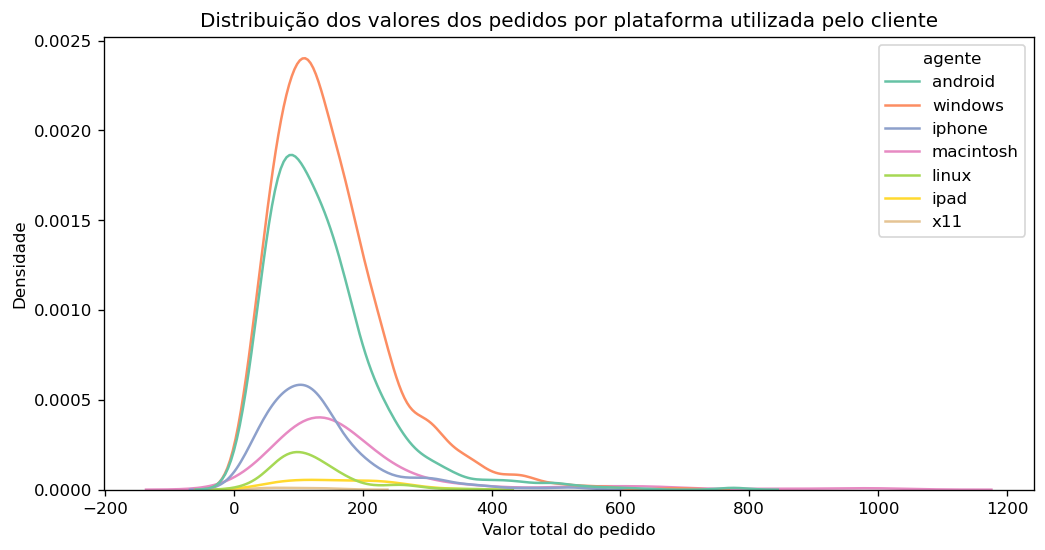

In [18]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.kdeplot(data=df_pw,x='vl_final_pedido',hue='agente',palette='Set2')
ax.set(title='Distribuição dos valores dos pedidos por plataforma utilizada pelo cliente',
       xlabel='Valor total do pedido',ylabel='Densidade');

Podemos ver que, no geral, a distribuição de valores por plataforma não apresenta diferenças significativas.

## Como os clientes pagam suas contas?
Qual a popularidade de cada meio de pagamento disponível? Esta informação pode ser importante para decidir quais formas de compra merecem mais atenção, de forma que nunca fiquem indisponíveis, bem como descobrir outras muito pouco populares que podem ser descartadas caso sua manutenção seja custosa.

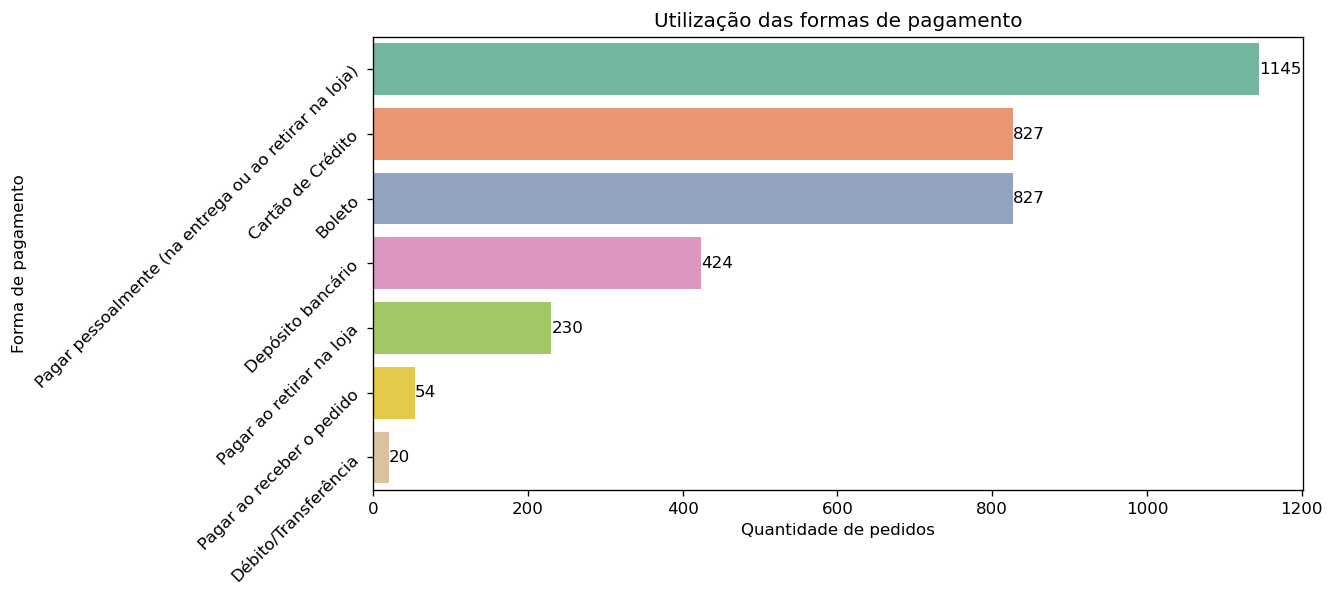

In [19]:
dados = df_pl.groupby('id_pedido')['tipo_pagamento'].agg(pd.Series.mode)

plt.figure(dpi=120,figsize=(10,5))
ax = sns.countplot(data=dados,y=dados.index,order=dados.value_counts().index,palette='Set2')
ax.set(title='Utilização das formas de pagamento',xlabel='Quantidade de pedidos',ylabel='Forma de pagamento')
plt.yticks(rotation=45)
ax.bar_label(ax.containers[0]);

Existe alguma relação entre a forma de pagamento e os valor final dos pedidos?

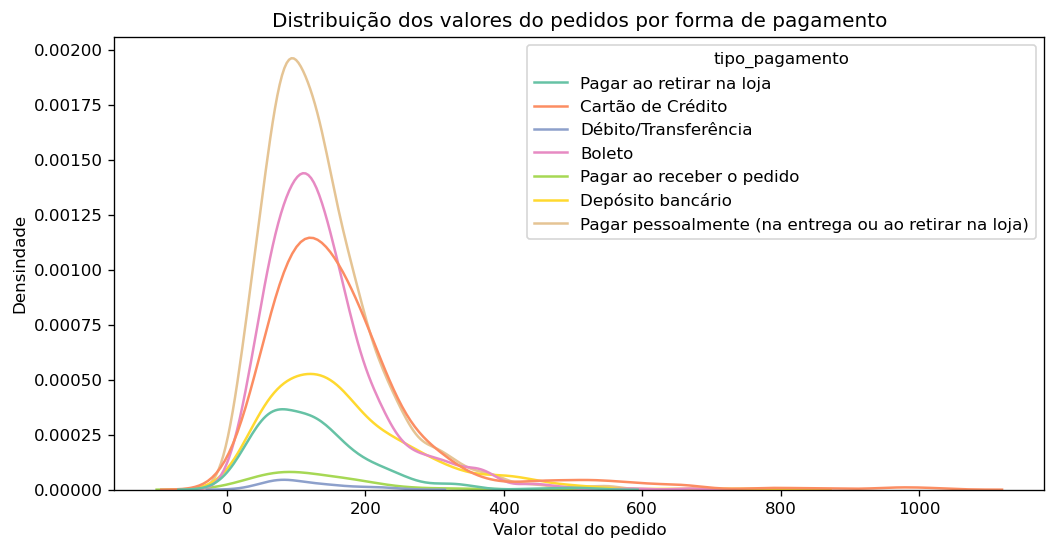

In [20]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.kdeplot(data=df_pw,x='vl_final_pedido',hue='tipo_pagamento',palette='Set2')
ax.set(title='Distribuição dos valores do pedidos por forma de pagamento',ylabel='Densindade',
       xlabel='Valor total do pedido');

É possível perceber que pagamentos para retirada na loja tendem a ter um valor um pouco mais baixo, talvez porque o cliente terá que carregar os produtos. Será que isso fica mais evidente se verificarmos a quantidade de itens nos pedidos?

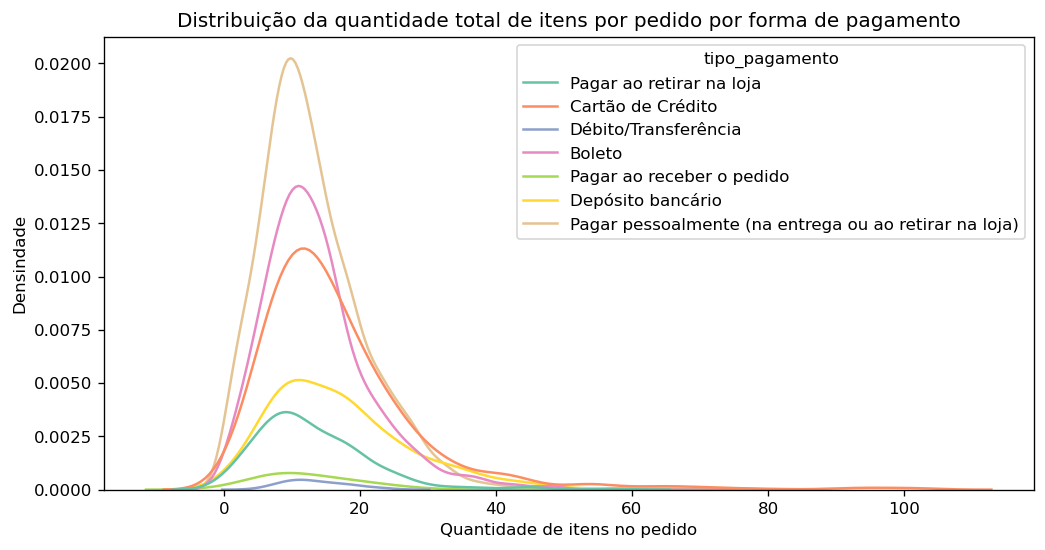

In [21]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.kdeplot(data=df_pw,x='qt_final_itens',hue='tipo_pagamento',palette='Set2')
ax.set(title='Distribuição da quantidade total de itens por pedido por forma de pagamento',ylabel='Densindade',
       xlabel='Quantidade de itens no pedido');

Não foi possível verificar diferença mais significativa ao utilizarmos a quantidade de itens por pedido. Perceba, entretanto, que é possível notar que os poucos pedidos cujo valor está bastante acima da média são pagos normalmente com cartão de crédito.

Vamos analisar mais uma distribuição gráfica que demonstra a distribuição dos valores dos pedidos por forma de pagamento.

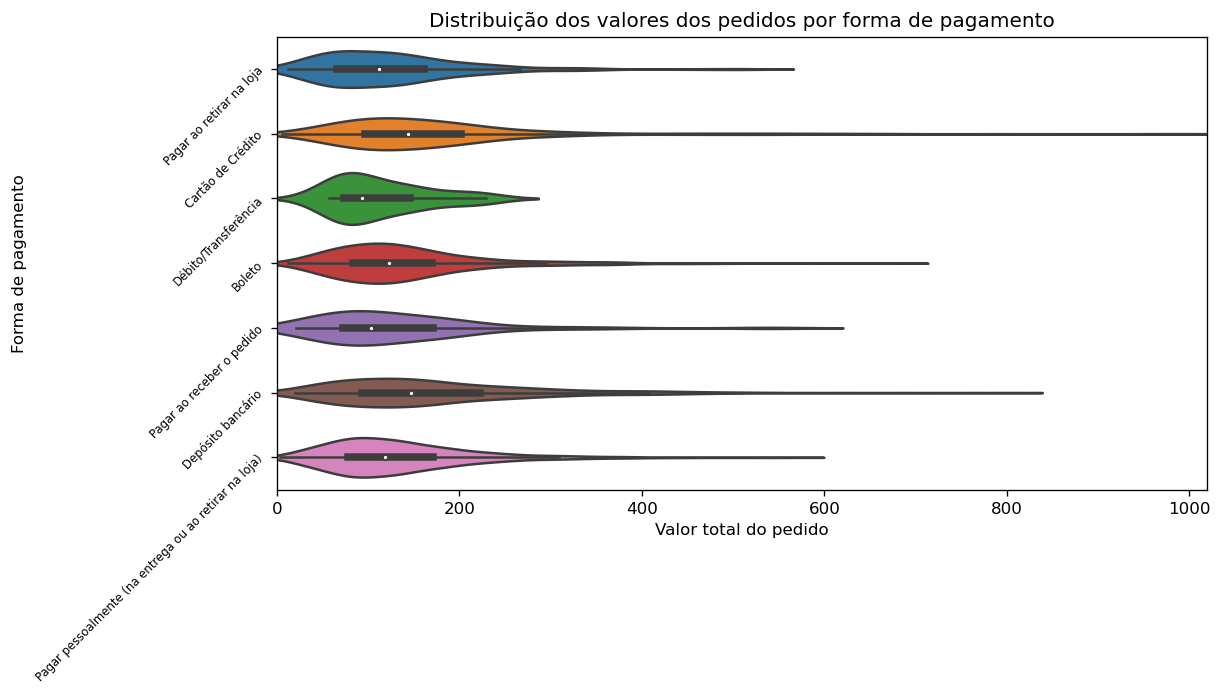

In [22]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.violinplot(data=df_pw,x='vl_final_pedido',y='tipo_pagamento')
ax.set(title='Distribuição dos valores dos pedidos por forma de pagamento',ylabel='Forma de pagamento',
       xlabel='Valor total do pedido')
plt.xlim(0,df_pw['vl_final_pedido'].max())
plt.yticks(rotation=45,fontsize=7);

## Correlação entre quantidade de itens por pedido e valor final da compra
Os gráficos acima sugerem que verifiquemos a correção entre algo bastante óbvio: a quantidade de itens por pedido e seu valor total.

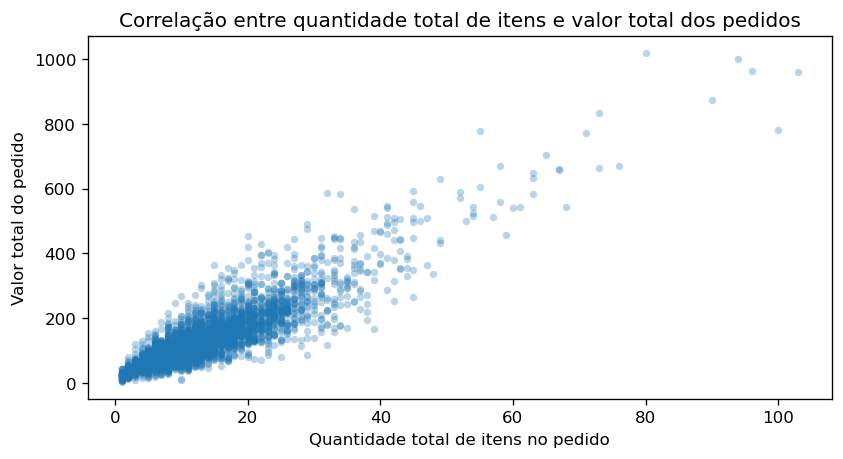

In [23]:
plt.figure(dpi=120,figsize=(8,4))
ax = sns.scatterplot(data=df_pw,x='qt_final_itens',y='vl_final_pedido',s=20,alpha=0.3,linewidth=0)
ax.set(title='Correlação entre quantidade total de itens e valor total dos pedidos',ylabel='Valor total do pedido',
      xlabel='Quantidade total de itens no pedido');

Vamos verificar o valor desta aparente forte correlação.

In [24]:
df_pw[['qt_final_itens','vl_final_pedido']].corr()

,qt_final_itens,vl_final_pedido
qt_final_itens,1.000000,0.879556
vl_final_pedido,0.879556,1.000000


Eis uma boa maneira de validar a impressão de que pedidos mais caros são normalmente pagos com cartão de crédito.

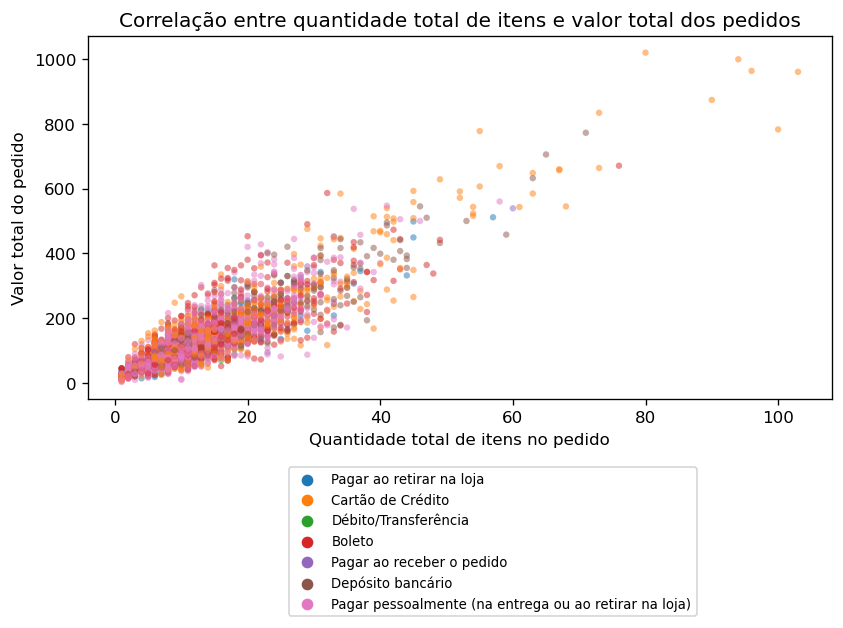

In [25]:
plt.figure(dpi=120,figsize=(8,4))
ax = sns.scatterplot(data=df_pw,x='qt_final_itens',y='vl_final_pedido',s=15,alpha=0.5,linewidth=0,
                     hue='tipo_pagamento')
ax.set(title='Correlação entre quantidade total de itens e valor total dos pedidos',ylabel='Valor total do pedido',
      xlabel='Quantidade total de itens no pedido')
plt.legend(loc=(0.27,-0.60),fontsize=8);

## Pedidos por região
Vamos analisar como os pedidos se distribuíram pelas cidades atendidas.

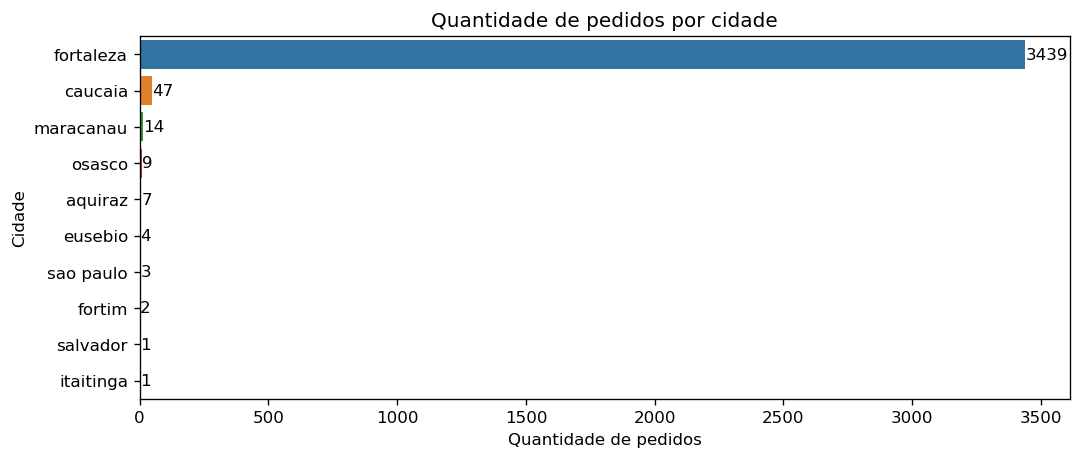

In [26]:
plt.figure(dpi=120,figsize=(10,4))
ax = sns.countplot(data=df_pw,y='cidade_pedido',order=df_pw['cidade_pedido'].value_counts().index)
ax.set(title='Quantidade de pedidos por cidade',xlabel='Quantidade de pedidos',ylabel='Cidade')
ax.bar_label(ax.containers[0]);

Claramente percebe-se que o foco de nossa análise regional deve se concentrar em bairros de Fortaleza. Vejamos a quantidade de pedidos por bairro. Para o gráfico permanecer legível, vamos limitá-lo aos 20 bairros com maior quantidade de pedidos.

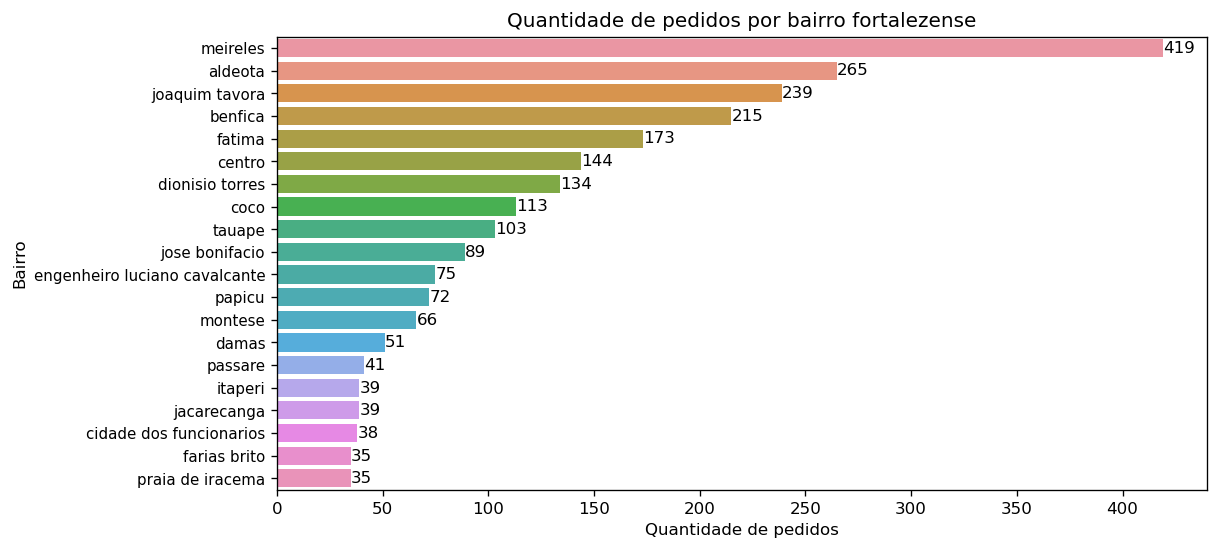

In [27]:
dados = df_pw[df_pw['cidade_pedido'] == 'fortaleza']

plt.figure(dpi=120,figsize=(10,5))
ax = sns.countplot(data=dados,y='bairro_pedido',order=dados['bairro_pedido'].value_counts().index[:20])
ax.set(title='Quantidade de pedidos por bairro fortalezense',xlabel='Quantidade de pedidos',ylabel='Bairro')
plt.yticks(fontsize=9)
ax.bar_label(ax.containers[0]);

Percebe-se que as vendas estão bastante concentradas em alguns poucos bairros. Uma possível explicação poderia ser maior concentração populacional neles. Para validar esta hipótese, precisamos saber qual a população de cada bairro. Esta informação está disponível em https://simda.sms.fortaleza.ce.gov.br/simda/populacao/faixa, de onde baixamos uma planilha que aqui será lida. A planilha foi levemente manipulada para enquadar-se perfeitamento às nossas necessidades.

In [28]:
# Primeiramente vamos criar um DataFrame que possui a população por bairro e formatá-lo para ficar compatível com
# nossos dados.
df_bairro = pd.read_excel('arquivos/População dos bairros fortalezenses.ods',skiprows=3,skipfooter=3)
df_bairro.drop(['0-9','10-18','19-59','60+'],inplace=True,axis=1)
df_bairro['BAIRRO'] = df_bairro['BAIRRO'].str.lower()
df_bairro.columns = ['bairro','populacao']
df_bairro.set_index('bairro',inplace=True)
df_bairro.head()

# Agora vamos acrescentar a quantidade de pedidos por bairro a este DataFrame. Linhas com valor nulo serão removidas
# pois não interessa à análise bairros sem qualquer pedido. 
df_bairro = df_bairro.join(df_pw[df_pw['cidade_pedido'] == 'fortaleza']['bairro_pedido'].value_counts())
df_bairro.dropna(inplace=True)
df_bairro.columns = ['populacao', 'pedidos']
df_bairro.head()

,populacao,pedidos
bairro,,
aerolandia,12523,2.0
aldeota,46701,265.0
alto da balanca,14127,6.0
alvaro weyne,26117,13.0
amadeu furtado,12901,15.0


Primeiramente vamos visualizar se existe correção entre a população de um bairro e quantidade de pedidos endereçados a ele.

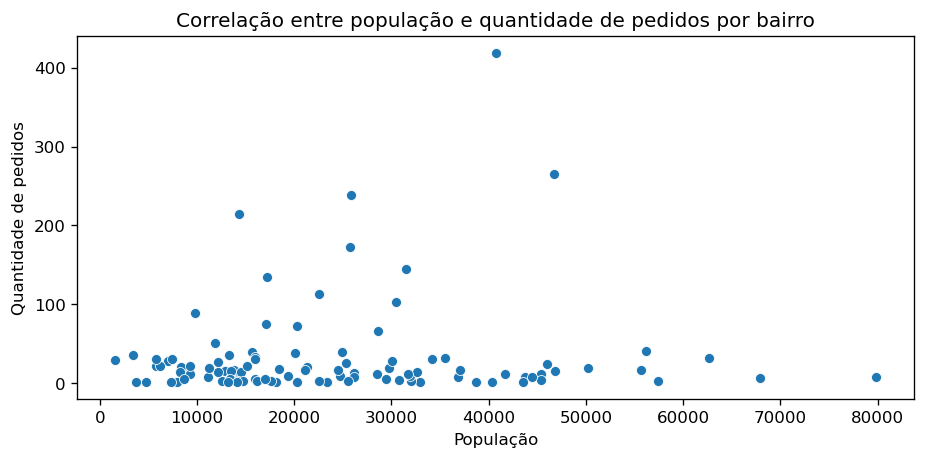

In [29]:
plt.figure(dpi=120,figsize=(9,4))
ax = sns.scatterplot(data=df_bairro,x='populacao',y='pedidos')
ax.set(title='Correlação entre população e quantidade de pedidos por bairro',xlabel='População',
       ylabel='Quantidade de pedidos');

Percebemos que não há correlação forte. Verifiquemos qual o valor da correlação.

In [30]:
df_bairro.corr()

,populacao,pedidos
populacao,1.000000,0.090837
pedidos,0.090837,1.000000


Vamos, mesmo assim, verificar a quantidade de produtos per capita vendidos nos bairros para averiguar em quais deles há um maior atingimento de seu público.

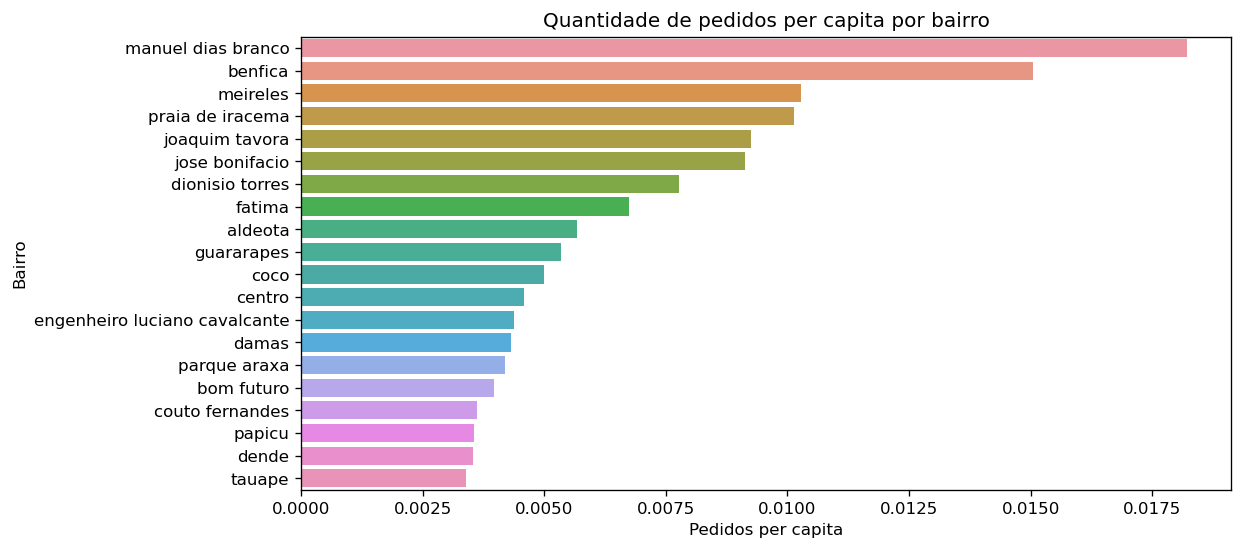

In [31]:
df_bairro['peds_per_capita'] = df_bairro['pedidos'] / df_bairro['populacao']

plt.figure(dpi=120,figsize=(10,5))
ax = sns.barplot(data=df_bairro,x='peds_per_capita',y=df_bairro.index,
            order=df_bairro.sort_values('peds_per_capita',ascending=False)[:20].index)
ax.set(title='Quantidade de pedidos per capita por bairro',xlabel='Pedidos per capita',ylabel='Bairro');

Até então, nossa análise regional baseou-se em quantidade de pedidos vendidos por bairro, e não em receita obtida por bairro. A princípio, poderíamos plotar os mesmos gráficos que plotamos acima utilizando, porém, a receita ao invés da quantidade de produtos. Entretanto, para evitar possível replicação de gráficos muito parecidos, vamos analisar se há correção entre a receita e a quantidade de pedidos de cada bairro. Caso haja, podemos assumir que os gráficos seriam bastante parecidos, mesmo sem vê-los.

In [32]:
# Agregando os valores de pedidos por bairro.
rec_bairro = df_pw[df_pw['cidade_pedido'] == 'fortaleza'][['bairro_pedido','vl_final_pedido']].groupby(
    'bairro_pedido').agg({'vl_final_pedido':['sum']})
rec_bairro.columns = ['receita']
rec_bairro.index.name = 'bairro'

# Acrescentando a receita ao DataFrame de bairros, assim como a receita per capita.
df_bairro = df_bairro.join(rec_bairro)
df_bairro['rec_per_capita'] = df_bairro['receita'] / df_bairro['populacao']

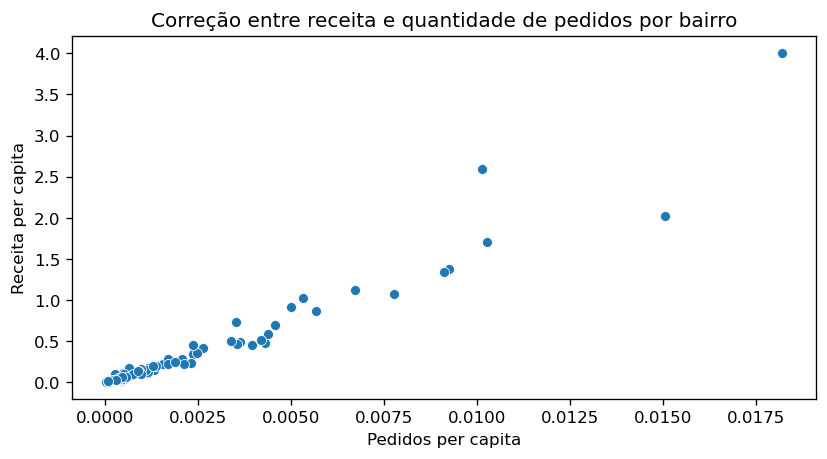

In [33]:
plt.figure(dpi=120,figsize=(8,4))
ax = sns.scatterplot(data=df_bairro,x='peds_per_capita',y='rec_per_capita')
ax.set(title='Correção entre receita e quantidade de pedidos por bairro',xlabel='Pedidos per capita',
      ylabel='Receita per capita');

Vamos verificar o valor da correlação.

In [34]:
df_bairro[['pedidos','receita']].corr()

,pedidos,receita
pedidos,1.00000,0.99318
receita,0.99318,1.00000


Podemos ver que a correlação entre a quantidade de pedidos por bairros com a receita por bairros é muito forte. Não vale a pena, portanto, refazer as análises utilizando receita por bairro.<P>
Como acabamos de ver, não há correção entre o tamanho da população de um bairro e a quantidade de pedidos. Será que há correlação entre a renda per capita e a quantidade de pedidos? A informação da renda per capita que utilizaremos a seguir foi retirada de https://www.ipece.ce.gov.br/wp-content/uploads/sites/45/2018/09/Ipece_Informe_42_outubro_2012.pdf.

In [35]:
# Lendo os dados de renda per capita e deixando-os compatíveis para join com o DataFrame de bairros.
df_rpc_bairro = pd.read_excel('arquivos/Renda per capita dos bairros fortalezenses.ods')
df_rpc_bairro['bairro'] = df_rpc_bairro['bairro'].str.lower()
df_rpc_bairro['bairro'] = df_rpc_bairro['bairro'].apply(unidecode)
df_rpc_bairro.set_index('bairro',inplace=True)
df_rpc_bairro

# Realização de join
df_bairro = df_bairro.join(df_rpc_bairro)
df_bairro.dropna()
df_bairro.head()

,populacao,pedidos,peds_per_capita,receita,rec_per_capita,renda per capita
bairro,,,,,,
aerolandia,12523,2.0,0.000160,127.00,0.010141,482.28
aldeota,46701,265.0,0.005674,40574.60,0.868817,2901.57
alto da balanca,14127,6.0,0.000425,238.70,0.016897,500.72
alvaro weyne,26117,13.0,0.000498,3069.30,0.117521,562.49
amadeu furtado,12901,15.0,0.001163,2251.85,0.174548,1065.93


Finalmente a verificação de existência de correção entre a quantidade de pedidos de um bairro e sua renda per capita.

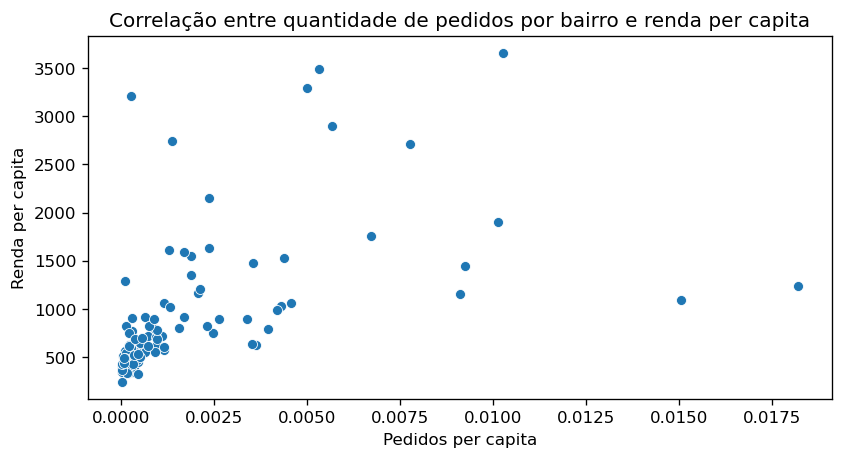

In [36]:
plt.figure(dpi=120,figsize=(8,4))
ax = sns.scatterplot(data=df_bairro,x='peds_per_capita',y='renda per capita')
ax.set(title='Correlação entre quantidade de pedidos por bairro e renda per capita',xlabel='Pedidos per capita',
      ylabel='Renda per capita');

Vamos verificar o valor da correção.

In [37]:
df_bairro[['peds_per_capita','renda per capita']].corr()

,peds_per_capita,renda per capita
peds_per_capita,1.000000,0.513668
renda per capita,0.513668,1.000000


Podemos perceber que há uma correção, porém não muito forte. Perceba que há dois bairros onde o potencial de vendas é consideravelmente mais realizado que estão na faixa de renda média baixa.

## Análise geográfica
Vamos verificar em um mapa de calor a distribuição geográfica dos pedidos. Utilizaremos aqui dados de posicionamento geográfico gerados em **2.1 - Captura de coordenadas geográficas por CEP.ipynb**.

In [38]:
# Primeiramente vamos isolar os CEPs dos pedidos em um novo DataFrame.
lista_ceps = df_pw['cep_pedido'].tolist()

# Agora vamos ler as coordenadas de todos os CEPs presentes na massa de dados.
df_coords = pd.read_csv('arquivos/Coordenadas geográficas dos CEPs.csv')

# Definindo uma função que retorna as coordenadas geográficas de um CEP.
def ret_coord_geo(cep):
    if cep in list(df_coords['cep']):
        latitude = df_coords[df_coords['cep'] == cep]['lat'].values[0]
        longitude = df_coords[df_coords['cep'] == cep]['long'].values[0]
        return latitude,longitude
    else:
        return None,None
    
# Montando uma lista com as coordenadas geográficas de cada pedido.
lista_coords = [ret_coord_geo(cep) for cep in lista_ceps]
lista_coords = [coords for coords in lista_coords if coords[0] != None]

In [39]:
# Mostrando o mapa de calor.
mapa = folium.Map(location=[-3.77, -38.53],tiles='OpenStreetMap',zoom_start=12)
mapa.add_child(plugins.HeatMap(lista_coords))
folium.Marker([-3.7571739265915802,-38.51565613865088],popup='Sede do Centro Frei Humberto').add_to(mapa)
mapa

## Análise de progressão temporal das vendas
Vamos analisar a progressão das vendas em todos o período existente no data set, que compreende datas entre 03 de julho de 2020 e 12 de fevereiro de 2022.

In [40]:
df_pw['data_pedido'] = pd.to_datetime(df_pw['data_pedido'])

# Criação de lista com todas as datas entre a menor e a maior data entre os pedidos.
lista_datas = pd.DataFrame(rrule(DAILY, dtstart=df_pw['data_pedido'].min(), until=df_pw['data_pedido'].max()),
                           columns=['data'])

# Criação de lista com quantidade de pedidos por data, com datas onde houve pedidos.
qt_compras_dt = pd.DataFrame(df_pw['data_pedido'].value_counts().sort_index())
qt_compras_dt.reset_index(inplace=True)
qt_compras_dt.columns = ['data','qt_pedidos']

# União das duas listas em um DataFrame unificado.
df_compras_dt = pd.merge(left=qt_compras_dt,right=lista_datas,how='outer',on='data',sort=True)
df_compras_dt.fillna(0,inplace=True)
df_compras_dt.head()

,data,qt_pedidos
0,2020-07-03,113.0
1,2020-07-04,78.0
2,2020-07-05,57.0
3,2020-07-06,76.0
4,2020-07-07,40.0


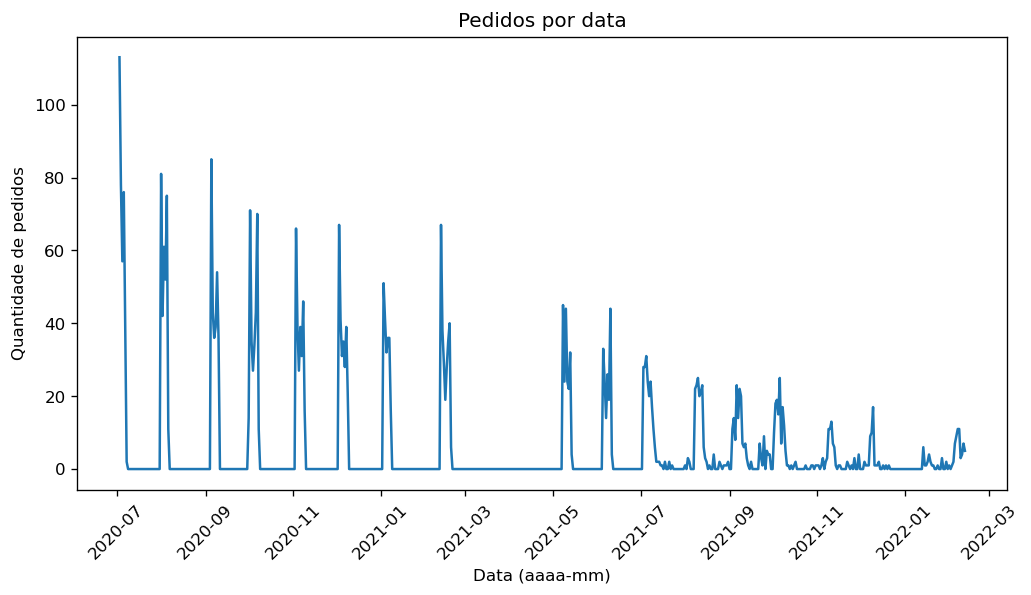

In [41]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.lineplot(data=df_compras_dt,x='data',y='qt_pedidos')
ax.set(title='Pedidos por data',xlabel='Data (aaaa-mm)',ylabel='Quantidade de pedidos')
plt.xticks(rotation=45);

Como o site foi criado e colocado no ar para ajudar a cooperativa a vender seus produtos ao longo da pandemia, vamos verificar se a queda na quantidade de vendas está relacionada a aumento na mobilidade das pessoas.<p>
As informações de mobilidade foram retiradas do site https://www.google.com/covid19/mobility/. Como a quantidade de dados era muito grande, abragendo o mundo inteiro, o arquivo aqui utilizado foi editado para conter somente as informações da cidade de Fortaleza.

In [42]:
# Primeiramente vamos ler as informações de mobilidade em Fortaleza.
df_mob = pd.read_csv('arquivos/Mobilidade Fortaleza 2020.csv')
df_mob = pd.concat([df_mob,pd.read_csv('arquivos/Mobilidade Fortaleza 2021.csv')])
df_mob = pd.concat([df_mob,pd.read_csv('arquivos/Mobilidade Fortaleza 2022.csv')])

# Agora vamos fazer uma limpeza, mantendo só aquilo que nos interessa, que é o índice de mobilidade em mercados no
# período no qual houve vendas na loja da cooperativa.
df_mob = df_mob[['date','grocery_and_pharmacy_percent_change_from_baseline']]
df_mob['date'] = pd.to_datetime(df_mob['date'])
df_mob = df_mob[(df_mob['date'] >= df_pw['data_pedido'].min()) & (df_mob['date'] <= df_pw['data_pedido'].max())]
df_mob.columns = ['data','mobilidade']

# Unindo os dados
df_compras_dt = pd.merge(left=df_compras_dt,right=df_mob,how='outer',on='data')
df_compras_dt.head()

,data,qt_pedidos,mobilidade
0,2020-07-03,113.0,12
1,2020-07-04,78.0,15
2,2020-07-05,57.0,5
3,2020-07-06,76.0,-6
4,2020-07-07,40.0,13


Precisamos normalizar os dados para fazer uma comparação interpretável, já que a quantidade de medidos e o índice de mobilidade são demonstrados em medidas diferentes. Utilizaremos o normalizador MinMaxScaler para deixar todos os valores entre 0 e 1.

In [43]:
df_comp_norm = df_compras_dt.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_comp_norm[['qt_pedidos','mobilidade']])
df_comp_norm[['qt_pedidos','mobilidade']] = scaled_data
df_comp_norm.head()

,data,qt_pedidos,mobilidade
0,2020-07-03,1.000000,0.622378
1,2020-07-04,0.690265,0.643357
2,2020-07-05,0.504425,0.573427
3,2020-07-06,0.672566,0.496503
4,2020-07-07,0.353982,0.629371


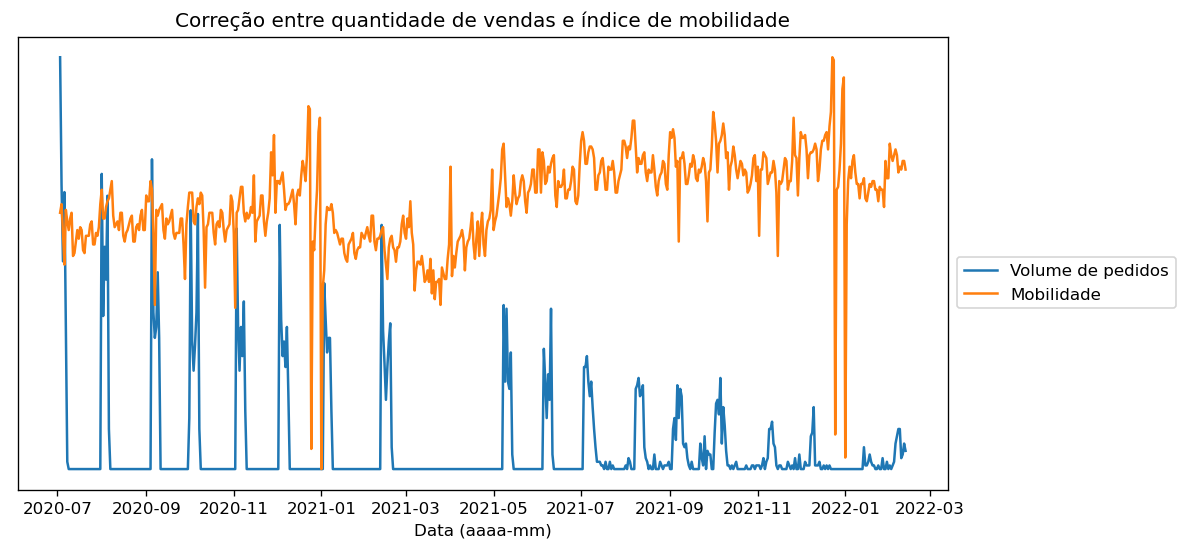

In [44]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.lineplot(data=pd.melt(df_comp_norm,['data']),x='data',y='value',hue='variable')
ax.set(yticks=[])
plt.legend(loc=(1.01,0.4),labels=['Volume de pedidos', 'Mobilidade'])
ax.set(title='Correção entre quantidade de vendas e índice de mobilidade',xlabel='Data (aaaa-mm)',ylabel='');

É possível verificar visualmente que há uma certa correlação. Neste caso, entretanto, não podemos nos utilizar do cálculo numérico da correlação para verificar sua força pois há dias sem venda ao longo dos meses devido ao ciclo de vendas da cooperativa, que ocorre somente alguns dias do mês. Verifiquemos esta ideia.

In [45]:
df_compras_dt.corr()

,qt_pedidos,mobilidade
qt_pedidos,1.000000,0.027249
mobilidade,0.027249,1.000000


Caso removamos os dias sem vendas, o valor numérico da correlação tornar-se-á algo mais interessante.

In [46]:
df_compras_dt[df_compras_dt['qt_pedidos'] != 0].corr()

,qt_pedidos,mobilidade
qt_pedidos,1.000000,-0.463268
mobilidade,-0.463268,1.000000


Agora sim! Perceba que faz muito sentido uma correção negativa, dado que quanto menos presença dos possíveis compradores em mercados, maior é a possibilidade de ele fazer feira em lojas virtuais.<p>
Por fim vamos verificar qual a carga de pedidos por hora. Esta informação pode ser importante para avaliar momentos onde o sistema pode estar mais carregado.

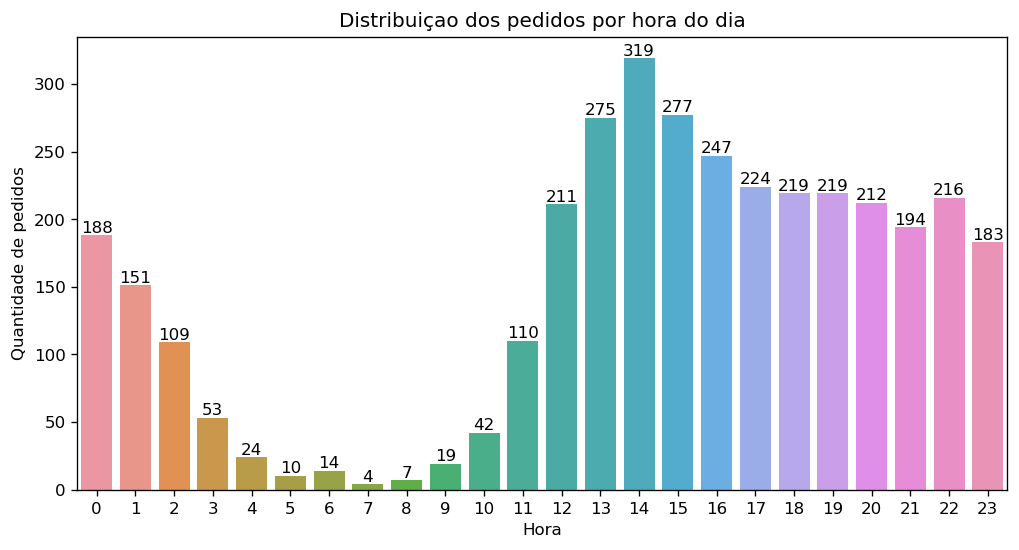

In [47]:
dados = pd.to_datetime(df_pw['hora_pedido']).dt.hour

plt.figure(dpi=120,figsize=(10,5))
ax = sns.countplot(x=dados.values)
ax.set(title='Distribuiçao dos pedidos por hora do dia',xlabel='Hora',ylabel='Quantidade de pedidos')
ax.bar_label(ax.containers[0]);